Make dataset from origin

(#, #) -> (640, 640)


bottom, edge zero padding, Green dots on every corner, filps

In [1]:
import os
import numpy as np
from PIL import Image
from PIL import ImageOps
from matplotlib import pyplot as plt

In [7]:
print('Current working directory :', os.getcwd())

pth = '/home/dongik/datasets/original_copy_cpn/Images'
mpth = '/home/dongik/datasets/original_copy_cpn/Masks'

dst = '/home/dongik/datasets/peroneal//Images'
mdst = '/home/dongik/datasets/peroneal/Masks'

if not os.path.exists(dst) or not os.path.exists(mdst):
    os.makedirs(dst)
    os.makedirs(mdst)

Current working directory : /home/dongik/src/cpn-vcs/notebook


In [9]:
''' Check peroneal data validity
'''
cnt = 0
for fname in os.listdir(pth):
    mname = fname.split('.')[0] + '_mask.' + fname.split('.')[-1]
    if not os.path.exists( os.path.join(pth, fname) ) or not os.path.exists( os.path.join(mpth, mname) ):
        raise Exception (' file corrupted.', cnt, pth, fname, mpth, mname)
    else:
        cnt += 1
print('total files : ', cnt)

total files :  490


In [33]:
cnt = 0
for fname in os.listdir(pth):
    mname = fname.split('.')[0] + '_mask.bmp'
    img = Image.open(os.path.join(pth, fname)).convert('RGB')
    mask = Image.open(os.path.join(mpth, mname)).convert('L')

    if img.size[0] > 640:
        # center crop WxH
        img = img.crop( (int(img.size[0]/2) - 320, 0, int(img.size[0]/2) + 320, img.size[1]) )
        mask = mask.crop( (int(img.size[0]/2) - 320, 0, int(img.size[0]/2) + 320, img.size[1]) )
        
    if img.size[1] > 640:
        img = img.crop( (0, int(img.size[1]/2) - 320, img.size[0], int(img.size[1]/2) + 320) )
        mask = mask.crop( (0, int(img.size[1]/2) - 320, img.size[0], int(img.size[1]/2) + 320) )

    if img.size[0] > 640 or img.size[1] > 640:
        raise Exception(fname, img.size)

    # green dots
    img = np.array(img, dtype=np.uint8)
    img[0:10, 0:10] = [0, 255, 0]
    img[0:10, -10:] = [0, 255, 0]
    img[-10:, 0:10] = [0, 255, 0]
    img[-10:, -10:] = [0, 255, 0]
    img = Image.fromarray(img)
    
    h, w = np.where(np.array(mask, dtype=np.uint8) > 0)
    tl = (w.min(), h.min())
    br = (w.max(), h.max())

    #img = ImageOps.pad(img, (640, 640), color=255, centering=(320, 320))
    #mask = ImageOps.pad(mask, (640, 640), color=255, centering=(320, 320))
    width = 640-img.size[0]
    height = 640-img.size[1]

    if width % 2 == 0 and width > 0:
        left, right = width/2, width/2
    elif width % 2 == 1:
        left, right = (width + 1)/2, (width - 1)/2
    else:
        left, right = 0, 0

    if height % 2 == 0 and height > 0:
        top, bottom = height/2, height/2
    elif height % 2 ==1:
        top, bottom = (height + 1)/2, (height - 1)/2
    else:
        top, bottom = 0, 0

    border = (int(left), int(top), int(right), int(bottom))

    img = ImageOps.expand(img, border, fill=0)
    mask = ImageOps.expand(mask, border, fill=0)

    #assert ( img.size == mask.size == (640, 640))
    if img.size != (640, 640) or mask.size != (640, 640):
        raise Exception(cnt, fname, border, img.size, mask.size)

    img.save(os.path.join(dst, fname))
    mask.save(os.path.join(mdst, fname))

    #mask = mask.convert('RGB')
    #overlay = np.array(img, dtype=np.float32)/2 + np.array(mask, dtype=np.float32)/2
    #overlay = Image.fromarray(overlay.astype(np.uint8))
    #overlay.save(os.path.join('/home/dongik/datasets/peroneal/', fname))
    cnt += 1

print(f'cnt: {cnt}')
    

cnt: 490


In [28]:
pth = '/data1/sdi/datasets/Median/Images'
mpth = '/data1/sdi/datasets/Median/Masks'

dst = '/data1/sdi/datasets/Median_padw/Images'
mdst = '/data1/sdi/datasets/Median_padw/Masks'

for fname in os.listdir(pth):
    img = Image.open(os.path.join(pth, fname)).convert('L')
    mask = Image.open(os.path.join(mpth, fname)).convert('L')

    if img.size[0] > 640 or img.size[1] > 640:
        img = ImageOps.expand(img, (0, 0, 896-img.size[0], 640-img.size[1]), fill=255)
        mask = ImageOps.expand(mask, (0, 0, 896-mask.size[0], 640-mask.size[1]), fill=0)
        
    else:
        img = ImageOps.expand(img, (0, 0, 640-img.size[0], 640-img.size[1]), fill=255)
        mask = ImageOps.expand(mask, (0, 0, 640-mask.size[0], 640-mask.size[1]), fill=0)

    img.save(os.path.join(dst, fname))
    mask.save(os.path.join(mdst, fname))

    #plt.imshow(img, cmap='gray')
    # if img.size not in cnt.keys():
    #     cnt[img.size] = 0
    # else:
    #     cnt[img.size] += 1

In [2]:
import os
from PIL import Image

pth = '/data1/sdi/datasets/_Median/Images'

cnt = {}
for fname in os.listdir(pth):
    img = Image.open(os.path.join(pth, fname))
    if img.size not in cnt.keys():
        cnt[img.size] = 1
    else:
        cnt[img.size] += 1
cnt

{(864, 576): 502, (565, 442): 803}

In [ ]:
pth = '/data1/sdi/datasets/CPN_all/Images'

cntw = 0
cnth = 0
fnamelist = []
for fname in os.listdir(pth):
    img = Image.open(os.path.join(pth, fname))
    #print(img.size[0], img.size[1])
    if img.size[0] > 640:
        cntw += 1
        print(fname, img.size)
        fnamelist.append(fname)
    if img.size[1] > 640:
        cnth += 1
        print(fname, img.size)
    # img = ImageOps.pad(img, (512, 512), centering=(0, 0))
    # plt.imshow(img, cmap='gray')
print(cntw, cnth)

In [ ]:
for fname in fnamelist:
    mname = fname.split('.')[0] + '_mask.bmp'
    img = Image.open(f'/data1/sdi/datasets/CPN_all/Images/{fname}').convert('L')
    mask = Image.open(f'/data1/sdi/datasets/CPN_all/Masks/{mname}').convert('L')
    print(f'size: {img.size}')
    cimg = img.crop( (int(img.size[0]/2) - 320, 0, int(img.size[0]/2) + 320, img.size[1]) )
    plt.imshow(cimg, cmap='gray')
    plt.show()
    cmask = mask.crop( (int(img.size[0]/2) - 320, 0, int(img.size[0]/2) + 320, img.size[1]) )
    plt.imshow(cmask, cmap='gray')
    plt.show()
    print(f'size: {cmask.size}')
    cimg.save(f'/data1/sdi/datasets/CPN_pad/Images/{fname}')
    cmask.save(f'/data1/sdi/datasets/CPN_pad/Masks/{mname}')

In [ ]:
import numpy as np
pth = '/data1/sdi/datasets/CPN_pad/Images'
for fname in os.listdir(pth):
    mname = fname.split('.')[0] + '_mask.bmp'
    img = Image.open(f'/data1/sdi/datasets/CPN_pad/Images/{fname}').convert('L')
    mask = Image.open(f'/data1/sdi/datasets/CPN_pad/Masks/{mname}').convert('L')
    plt.imshow(np.array(mask)/2 + np.array(img)/2, cmap='gray')
    plt.show()

    cimg = np.array(ImageOps.pad(img, (640, 640), color=255, centering=(0, 0)))
    cmask = np.array(ImageOps.pad(mask, (640, 640), color=255, centering=(0, 0)))
    plt.imshow(cimg/2 + cmask/2, cmap='gray')
    plt.show()
    

In [35]:
pth = ['/home/dongik/datasets/US_segmentation/newset/wrist_train/wrist_HM70A/',
        '/home/dongik/datasets/US_segmentation/newset/wrist_train/wrist_miniSONO/',
        '/home/dongik/datasets/US_segmentation/newset/forearm_train/forearm_HM70A/',
        '/home/dongik/datasets/US_segmentation/newset/forearm_train/forearm_miniSONO/']

mpth = ['/home/dongik/datasets/US_segmentation/newset/wrist_target/wrist_HM70A/',
        '/home/dongik/datasets/US_segmentation/newset/wrist_target/wrist_miniSONO/',
        '/home/dongik/datasets/US_segmentation/newset/forearm_target/forearm_HM70A/',
        '/home/dongik/datasets/US_segmentation/newset/forearm_target/forearm_miniSONO/']

dst = ['/home/dongik/datasets/median-wrist/HM/Images',
        '/home/dongik/datasets/median-wrist/SN/Images',
        '/home/dongik/datasets/median-forearm/HM/Images',
        '/home/dongik/datasets/median-forearm/SN/Images']

mdst = ['/home/dongik/datasets/median-wrist/HM/Masks',
        '/home/dongik/datasets/median-wrist/SN/Masks',
        '/home/dongik/datasets/median-forearm/HM/Masks',
        '/home/dongik/datasets/median-forearm/SN/Masks']

In [45]:
for i in range(4):
    cnt = 0
    if not os.path.exists(dst[i]):
        os.mkdir(dst[i])
        os.mkdir(mdst[i])

    for fname in os.listdir(pth[i]):
        img = Image.open(os.path.join(pth[i], fname)).convert('RGB')
        mask = Image.open(os.path.join(mpth[i], fname)).convert('L')

        h, w = np.where(np.array(mask, dtype=np.uint8) > 0)
        tl = (w.min(), h.min())
        br = (w.max(), h.max())

        if br[0] - tl[0] > 640 or br[1] - tl[1] > 640:
            raise Exception (br[0] - tl[0], br[1] - tl[1])

        if int(img.size[0]/2) - 320 > tl[0]:
            raise Exception ('(w) mask boundary is sticking out')
        if int(img.size[0]/2) + 320 < br[0]:
            raise Exception ('(w) mask boundary is sticking out')
        if int(img.size[1]/2) - 320 > tl[1] or int(img.size[1]/2) + 320 < br[1]:
            raise Exception ('(h) mask boundary is sticking out')

        #print(tl, br, img.size)
        #print(int(img.size[0]/2) - 320)
        #print(int(img.size[0]/2) + 320)
        #break
        if img.size[0] > 640:
            # center crop WxH .crop((left, upper, right, lower))
            img = img.crop( (int(img.size[0]/2) - 320, 0, int(img.size[0]/2) + 320, img.size[1]) )
            mask = mask.crop( (int(img.size[0]/2) - 320, 0, int(img.size[0]/2) + 320, img.size[1]) )
            print("crop")
            
        if img.size[1] > 640:
            img = img.crop( (0, int(img.size[1]/2) - 320, img.size[0], int(img.size[1]/2) + 320) )
            mask = mask.crop( (0, int(img.size[1]/2) - 320, img.size[0], int(img.size[1]/2) + 320) )

        if img.size[0] > 640 or img.size[1] > 640:
            raise Exception(fname, img.size)

        # green dots
        img = np.array(img, dtype=np.uint8)
        img[0:10, 0:10] = [0, 255, 0]
        img[0:10, -10:] = [0, 255, 0]
        img[-10:, 0:10] = [0, 255, 0]
        img[-10:, -10:] = [0, 255, 0]
        img = Image.fromarray(img)

        #img = ImageOps.pad(img, (640, 640), color=255, centering=(320, 320))
        #mask = ImageOps.pad(mask, (640, 640), color=255, centering=(320, 320))
        width = 640-img.size[0]
        height = 640-img.size[1]

        if width % 2 == 0 and width > 0:
            left, right = width/2, width/2
        elif width % 2 == 1:
            left, right = (width + 1)/2, (width - 1)/2
        else:
            left, right = 0, 0

        if height % 2 == 0 and height > 0:
            top, bottom = height/2, height/2
        elif height % 2 ==1:
            top, bottom = (height + 1)/2, (height - 1)/2
        else:
            top, bottom = 0, 0

        border = (int(left), int(top), int(right), int(bottom))

        img = ImageOps.expand(img, border, fill=0)
        mask = ImageOps.expand(mask, border, fill=0)

        #assert ( img.size == mask.size == (640, 640))
        if img.size != (640, 640) or mask.size != (640, 640):
            raise Exception(cnt, fname, border, img.size, mask.size)

        img.save(os.path.join(dst[i], fname))
        mask.save(os.path.join(mdst[i], fname))

        #mask = mask.convert('RGB')
        #overlay = np.array(img, dtype=np.float32)/2 + np.array(mask, dtype=np.float32)/2
        #overlay = Image.fromarray(overlay.astype(np.uint8))
        #overlay.save(os.path.join('/home/dongik/datasets/peroneal/', fname))
        cnt += 1

    print(f'cnt: {cnt}')

(208, 40) (359, 95) (565, 442)
-38
602
cnt: 0
(296, 80) (463, 151) (864, 576)
112
752
cnt: 0
(248, 160) (343, 199) (565, 442)
-38
602
cnt: 0
(440, 208) (575, 271) (864, 576)
112
752
cnt: 0


In [50]:
smp_img = '/home/dongik/datasets/US_segmentation/newset/wrist_train/wrist_miniSONO/0001084.jpg'
smp_mask = '/home/dongik/datasets/US_segmentation/newset/wrist_target/wrist_miniSONO/0001084.jpg'

image = Image.open(smp_img).convert('RGB')
mask = Image.open(smp_mask).convert('L')

h, w = np.where(np.array(mask, dtype=np.uint8) > 0)
tl = (w.min(), h.min())
br = (w.max(), h.max())

In [52]:
print(tl, br)
print(image.size)

(512, 152) (727, 207)
(864, 576)


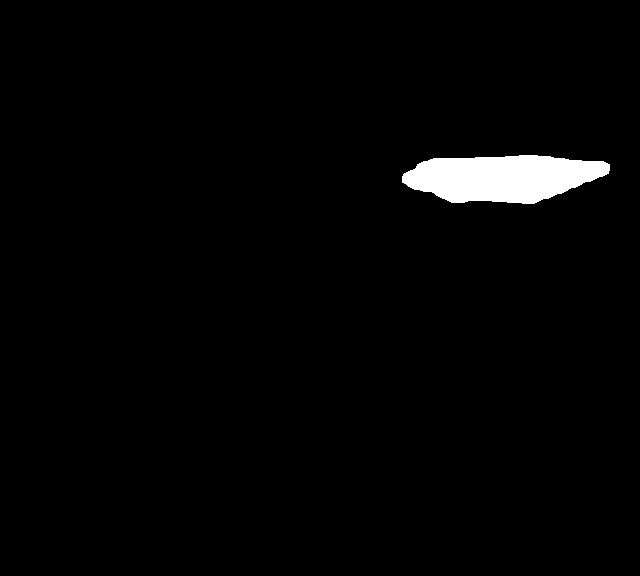

In [54]:
mask.crop( (int(img.size[0]/2) - 320, 0, int(img.size[0]/2) + 320, img.size[1]) )